In [ ]:
import torch
from einops import reduce, rearrange
from bliss.reporting import get_snr
import matplotlib.pyplot as plt
from bliss.plotting import scatter_shade_plot
import numpy as np

In [ ]:
test_ds = torch.load("../data/data/single_galaxies_test.pt")

In [ ]:
test_ds.keys()

dict_keys(['images', 'background', 'noiseless', 'snr'])

In [ ]:
test_ds['images'].shape, test_ds['background'].shape

(torch.Size([20000, 1, 53, 53]), torch.Size([20000, 1, 53, 53]))

In [ ]:
tflux = reduce(test_ds['noiseless'] + test_ds['background'], 'b c h w -> b', 'sum')
pflux = reduce(test_ds['images'], 'b c h w -> b', 'sum')

In [ ]:
snr = get_snr(test_ds['noiseless'], test_ds['background'])

In [ ]:
snr.shape

torch.Size([20000])

(array([2.000e+00, 5.000e+00, 7.000e+00, 2.500e+01, 1.190e+02, 4.880e+02,
        3.321e+03, 3.880e+03, 3.168e+03, 2.526e+03, 1.891e+03, 1.357e+03,
        1.001e+03, 7.160e+02, 5.580e+02, 3.170e+02, 2.430e+02, 1.410e+02,
        9.300e+01, 6.600e+01, 3.500e+01, 2.500e+01, 1.000e+01, 5.000e+00,
        1.000e+00]),
 array([-0.73901737, -0.55845577, -0.37789416, -0.19733258, -0.01677099,
         0.16379061,  0.34435222,  0.52491379,  0.70547539,  0.88603699,
         1.06659853,  1.2471602 ,  1.42772174,  1.6082834 ,  1.78884494,
         1.9694066 ,  2.14996815,  2.33052969,  2.51109123,  2.69165301,
         2.87221456,  3.0527761 ,  3.23333764,  3.41389942,  3.59446096,
         3.77502251]),
 [<matplotlib.patches.Polygon at 0x7f81e4222e60>])

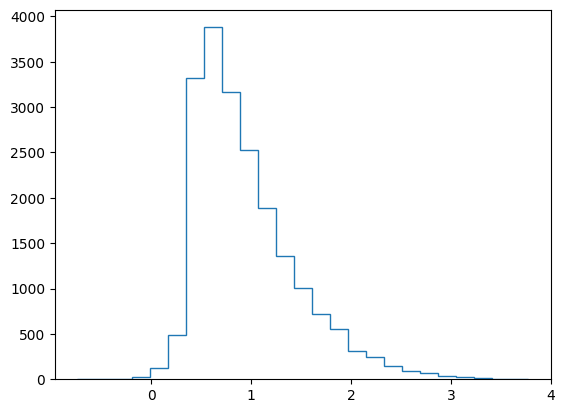

In [ ]:
plt.hist(snr.log10().numpy(), bins=25, histtype='step')

(array([1.000e+01, 3.500e+01, 1.360e+02, 3.850e+02, 1.158e+03, 2.766e+03,
        6.191e+03, 9.306e+03, 1.200e+01, 1.000e+00]),
 array([0.82605982, 1.32855999, 1.83106017, 2.33356023, 2.83606052,
        3.33856058, 3.84106064, 4.3435607 , 4.84606123, 5.34856129,
        5.85106134]),
 <BarContainer object of 10 artists>)

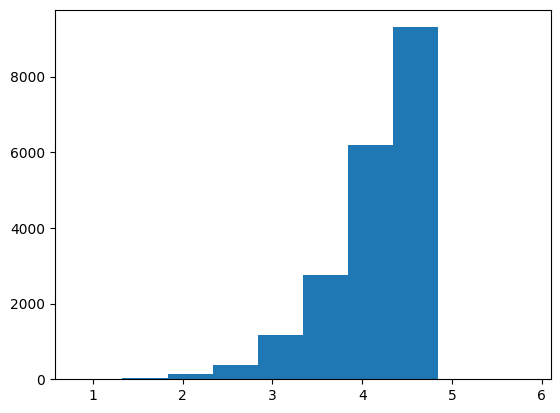

In [ ]:
plt.hist(y.log10())

/home/imendoza/bliss/bliss/plotting.py:256: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  y_bin: np.ndarray = y[keep_x]


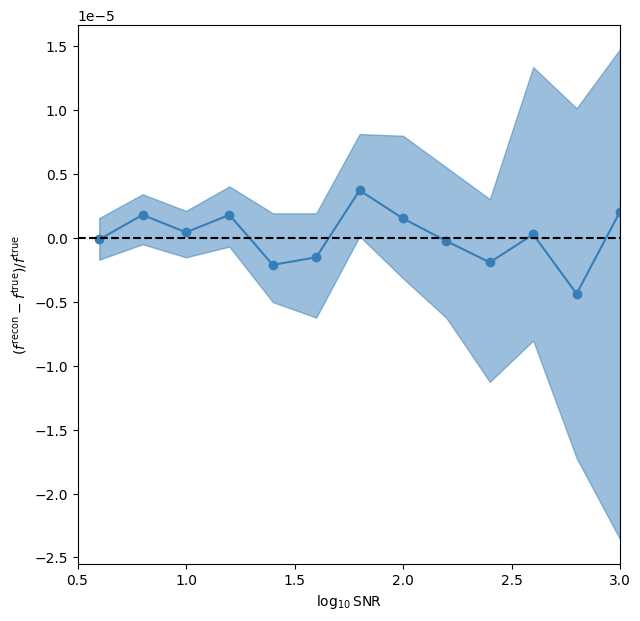

In [ ]:
xticks = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
xlims = (0.5, 3)
xlabel = r"$\log_{10} \rm SNR$"

fig, ax = plt.subplots(1, 1, figsize=(7,7))
x, y = np.log10(snr), (pflux - tflux) / tflux
xlims = (0.5, 3)
scatter_shade_plot(ax, x, y, xlims, delta=0.2, use_boot=True)
ax.set_xlim(xlims)
ax.set_xlabel(xlabel)
ax.set_ylabel(r"$(f^{\rm recon} - f^{\rm true}) / f^{\rm true}$")
ax.set_xticks(xticks)
ax.axhline(0, ls="--", color="k")